# House Price Regression Project

In [5]:
from warnings import filterwarnings
filterwarnings('ignore')


# Step 1: Read the train dataset

In [6]:
import pandas as pd
df = pd.read_csv('training_set.csv', na_values=['', 'NA'], keep_default_na=False)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Step 2: Perform Basic Data Quality checks

In [7]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
m = df.isna().sum()
m

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
m[m>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [10]:
df.duplicated().sum()

0

# Step 3: Seperate X and Y(SalePrice)

In [11]:
X = df.drop(columns=['Id', 'SalePrice'])
Y = df[['SalePrice']]

In [12]:
cat =[X.dtypes=='object']
con = [X.dtypes!='object']

In [13]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [14]:
Y.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


# Step 4: Perform Feature selection
For feature selection pipeline use OrdinalEncoding for Categorical features

In [15]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [16]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [17]:
con

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [19]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())])

In [20]:
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='constant',fill_value='Not_Avail')),
                           ('ordinal', OrdinalEncoder())])

In [21]:
pre1 = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [22]:
X_pre1 = pre1.fit_transform(X)
X_pre1.head()

,num__MSSubClass,num__LotFrontage,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,...,cat__GarageType,cat__GarageFinish,cat__GarageQual,cat__GarageCond,cat__PavedDrive,cat__PoolQC,cat__Fence,cat__MiscFeature,cat__SaleType,cat__SaleCondition
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,...,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,0.0
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0


In [23]:
# Apply feature selection process
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
lr = LinearRegression()
sel = SequentialFeatureSelector(lr, 
                                n_features_to_select='auto', 
                                direction='backward')
sel.fit(X_pre1, Y)
sel_cols = sel.get_feature_names_out()
sel_cols

array(['num__MSSubClass', 'num__LotArea', 'num__OverallQual',
       'num__OverallCond', 'num__YearBuilt', 'num__MasVnrArea',
       'num__1stFlrSF', 'num__2ndFlrSF', 'num__LowQualFinSF',
       'num__GrLivArea', 'num__BsmtFullBath', 'num__KitchenAbvGr',
       'num__TotRmsAbvGrd', 'num__Fireplaces', 'num__GarageCars',
       'num__WoodDeckSF', 'num__ScreenPorch', 'num__YrSold',
       'cat__MSZoning', 'cat__LandContour', 'cat__Neighborhood',
       'cat__BldgType', 'cat__HouseStyle', 'cat__RoofMatl',
       'cat__Exterior1st', 'cat__MasVnrType', 'cat__ExterQual',
       'cat__Foundation', 'cat__BsmtQual', 'cat__BsmtCond',
       'cat__BsmtExposure', 'cat__BsmtFinType2', 'cat__HeatingQC',
       'cat__KitchenQual', 'cat__Functional', 'cat__GarageFinish',
       'cat__PavedDrive', 'cat__Fence', 'cat__MiscFeature',
       'cat__SaleCondition'], dtype=object)

In [24]:
len(sel_cols)

40

In [25]:
sel_cols[0]

'num__MSSubClass'

In [26]:
sel_cols[0].split('__')

['num', 'MSSubClass']

In [27]:
sel_cols[0].split('__')[1]

'MSSubClass'

In [28]:

imp_cols = []
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)

In [29]:
imp_cols

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'ScreenPorch',
 'YrSold',
 'MSZoning',
 'LandContour',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofMatl',
 'Exterior1st',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'GarageFinish',
 'PavedDrive',
 'Fence',
 'MiscFeature',
 'SaleCondition']

In [30]:
X_sel = X[imp_cols]
X_sel.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,BsmtExposure,BsmtFinType2,HeatingQC,KitchenQual,Functional,GarageFinish,PavedDrive,Fence,MiscFeature,SaleCondition
0,60,8450,7,5,2003,196.0,856,854,0,1710,...,No,Unf,Ex,Gd,Typ,RFn,Y,NaN,NaN,Normal
1,20,9600,6,8,1976,0.0,1262,0,0,1262,...,Gd,Unf,Ex,TA,Typ,RFn,Y,NaN,NaN,Normal
2,60,11250,7,5,2001,162.0,920,866,0,1786,...,Mn,Unf,Ex,Gd,Typ,RFn,Y,NaN,NaN,Normal
3,70,9550,7,5,1915,0.0,961,756,0,1717,...,No,Unf,Gd,Gd,Typ,Unf,Y,NaN,NaN,Abnorml
4,60,14260,8,5,2000,350.0,1145,1053,0,2198,...,Av,Unf,Ex,Gd,Typ,RFn,Y,NaN,NaN,Normal



# Step 5: Create a main pipeline for Final models
Categorical features - OneHotEncoder

In [31]:
# Seperate cat_sel and con_sel
cat_sel = list(X_sel.columns[X_sel.dtypes=='object'])
con_sel = list(X_sel.columns[X_sel.dtypes!='object'])

In [32]:
from sklearn.preprocessing import OneHotEncoder

In [33]:
num_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                            ('scaler', StandardScaler())])

In [34]:
cat_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='constant',
                                                     fill_value='Not_Avail')),
                            ('Ohe', OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False))])

In [35]:
pre2 = ColumnTransformer([('num', num_pipe2, con_sel),
                          ('cat', cat_pipe2, cat_sel)]).set_output(transform='pandas')

In [36]:

pre2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['MSSubClass', 'LotArea', 'OverallQual',
                                  'OverallCond', 'YearBuilt', 'MasVnrArea',
                                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                                  'GrLivArea', 'BsmtFullBath', 'KitchenAbvGr',
                                  'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
                                  'WoodDeckSF', 'ScreenPorch', 'YrSold']),
                                ('c...
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['MSZoning', 'LandContour', 'Neighborhood',
                                  'BldgType', 'HouseStyle', 'RoofMatl',
                                  'Exterior1st', 'MasVnrType', 'ExterQual',
                                  'Foundation', 'BsmtQual', 'BsmtCond',
                                  'BsmtExposure', 'BsmtFinType2', 'HeatingQC',
                                  'KitchenQual', 'Functional', 'GarageFinish',
                                  'PavedDrive', 'Fence', 'MiscFeature',
                                  'SaleCondition'])])

In [37]:
X_sel_pre = pre2.fit_transform(X_sel)
X_sel_pre.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__1stFlrSF,num__2ndFlrSF,num__LowQualFinSF,num__GrLivArea,...,cat__MiscFeature_Not_Avail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC,cat__SaleCondition_Abnorml,cat__SaleCondition_AdjLand,cat__SaleCondition_Alloca,cat__SaleCondition_Family,cat__SaleCondition_Normal,cat__SaleCondition_Partial
0,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.511418,-0.793434,1.161852,-0.120242,0.370333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.574410,0.257140,-0.795163,-0.120242,-0.482512,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.073375,0.073480,0.651479,-0.517200,0.984752,0.323060,-0.627826,1.189351,-0.120242,0.515013,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.574410,-0.521734,0.937276,-0.120242,0.383659,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.073375,0.375148,1.374795,-0.517200,0.951632,1.364570,-0.045611,1.617877,-0.120242,1.299326,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Step 6: Perform train test split

In [38]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_sel_pre, Y, 
                                                test_size=0.2,
                                                random_state=21)

In [39]:
xtrain.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__1stFlrSF,num__2ndFlrSF,num__LowQualFinSF,num__GrLivArea,...,cat__MiscFeature_Not_Avail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC,cat__SaleCondition_Abnorml,cat__SaleCondition_AdjLand,cat__SaleCondition_Alloca,cat__SaleCondition_Family,cat__SaleCondition_Normal,cat__SaleCondition_Partial
710,-0.636078,-0.640101,-2.241782,0.381743,-1.201217,-0.574410,-1.122062,-0.795163,-0.120242,-1.497169,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1098,-0.163109,-0.452686,-1.518467,0.381743,-1.168096,-0.574410,-1.049608,0.504166,-0.120242,-0.364484,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1286,-0.872563,-0.072844,-0.071836,-0.517200,-0.273836,1.924104,0.427923,-0.795163,-0.120242,-0.356870,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
992,0.073375,-0.075851,-0.071836,2.179628,-0.240715,1.309170,-0.369064,1.109145,-0.120242,0.638751,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
631,1.492282,-0.593999,1.374795,-0.517200,1.150356,0.023903,1.012726,-0.795163,-0.120242,0.073361,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [40]:
ytrain.head()

,SalePrice
710,52000
1098,128000
1286,143000
992,187000
631,209500


In [41]:

xtest.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__1stFlrSF,num__2ndFlrSF,num__LowQualFinSF,num__GrLivArea,...,cat__MiscFeature_Not_Avail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC,cat__SaleCondition_Abnorml,cat__SaleCondition_AdjLand,cat__SaleCondition_Alloca,cat__SaleCondition_Family,cat__SaleCondition_Normal,cat__SaleCondition_Partial
880,-0.872563,-0.350058,-0.795151,-0.517200,1.117235,-0.574410,-0.187930,-0.795163,-0.120242,-0.809944,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
605,0.073375,0.309002,0.651479,0.381743,-0.207594,0.400620,0.060481,1.038106,-0.120242,0.895747,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1166,-0.872563,-0.004192,1.374795,-0.517200,1.216598,-0.175535,1.374993,-0.795163,-0.120242,0.339875,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
216,-0.872563,-0.207142,0.651479,-0.517200,1.084115,0.899214,0.707387,-0.795163,-0.120242,-0.151273,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
970,-0.163109,0.028380,-1.518467,-1.416142,-0.737526,-0.574410,-1.145350,0.286466,-0.120242,-0.615769,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [42]:

ytest.head()

,SalePrice
880,157000
605,205000
1166,245350
216,210000
970,135000


In [43]:
xtrain.shape

(1168, 164)

In [44]:
xtest.shape

(292, 164)


# Step 7: Build model

In [45]:

from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(xtrain, ytrain)

LinearRegression()

In [46]:
model1.score(xtrain, ytrain)

0.9204493851926674

In [48]:

model1.score(xtest, ytest)

-4.0090490786942424e+16


Ridge Model

In [49]:
import numpy as np 
params_ridge = {'alpha':np.arange(0.1, 100, 0.1)}

In [50]:
params_ridge

{'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
         1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
         2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
         3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
         4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
         5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
         6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
         7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
         8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
        10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
        11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1,
        12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2,
        13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
        14.4, 14.5, 14.6, 14.

In [51]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge_model = Ridge()
gscv_ridge = GridSearchCV(estimator=ridge_model, param_grid=params_ridge,
                          cv=5, scoring='r2')
gscv_ridge.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7....
       92.5, 92.6, 92.7, 92.8, 92.9, 93. , 93.1, 93.2, 93.3, 93.4, 93.5,
       93.6, 93.7, 93.8, 93.9, 94. , 94.1, 94.2, 94.3, 94.4, 94.5, 94.6,
       94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7,
       95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7, 96.8,
       96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9,
       98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. ,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9])},
             scoring='r2')

In [52]:

gscv_ridge.best_params_

{'alpha': 17.6}

In [53]:
gscv_ridge.best_score_

0.8498411034106512

In [54]:
best_ridge = gscv_ridge.best_estimator_
best_ridge

Ridge(alpha=17.6)

In [55]:
best_ridge.score(xtrain, ytrain)

0.887614540834283

In [56]:
best_ridge.score(xtest, ytest)

0.8375990149749694


# Lasso (L1) model

In [57]:
params_lasso = {'alpha':np.arange(110, 130, 0.1)}
params_lasso

{'alpha': array([110. , 110.1, 110.2, 110.3, 110.4, 110.5, 110.6, 110.7, 110.8,
        110.9, 111. , 111.1, 111.2, 111.3, 111.4, 111.5, 111.6, 111.7,
        111.8, 111.9, 112. , 112.1, 112.2, 112.3, 112.4, 112.5, 112.6,
        112.7, 112.8, 112.9, 113. , 113.1, 113.2, 113.3, 113.4, 113.5,
        113.6, 113.7, 113.8, 113.9, 114. , 114.1, 114.2, 114.3, 114.4,
        114.5, 114.6, 114.7, 114.8, 114.9, 115. , 115.1, 115.2, 115.3,
        115.4, 115.5, 115.6, 115.7, 115.8, 115.9, 116. , 116.1, 116.2,
        116.3, 116.4, 116.5, 116.6, 116.7, 116.8, 116.9, 117. , 117.1,
        117.2, 117.3, 117.4, 117.5, 117.6, 117.7, 117.8, 117.9, 118. ,
        118.1, 118.2, 118.3, 118.4, 118.5, 118.6, 118.7, 118.8, 118.9,
        119. , 119.1, 119.2, 119.3, 119.4, 119.5, 119.6, 119.7, 119.8,
        119.9, 120. , 120.1, 120.2, 120.3, 120.4, 120.5, 120.6, 120.7,
        120.8, 120.9, 121. , 121.1, 121.2, 121.3, 121.4, 121.5, 121.6,
        121.7, 121.8, 121.9, 122. , 122.1, 122.2, 122.3, 122.4, 122.

In [58]:
from sklearn.linear_model import Lasso 
lasso_model = Lasso()
gscv_lasso = GridSearchCV(estimator=lasso_model, param_grid=params_lasso,
                          cv=5, scoring='r2')
gscv_lasso.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([110. , 110.1, 110.2, 110.3, 110.4, 110.5, 110.6, 110.7, 110.8,
       110.9, 111. , 111.1, 111.2, 111.3, 111.4, 111.5, 111.6, 111.7,
       111.8, 111.9, 112. , 112.1, 112.2, 112.3, 112.4, 112.5, 112.6,
       112.7, 112.8, 112.9, 113. , 113.1, 113.2, 113.3, 113.4, 113.5,
       113.6, 113.7, 113.8, 113.9, 114. , 114.1, 114.2, 114.3, 114.4,
       114.5, 114.6, 114.7, 114....
       123.5, 123.6, 123.7, 123.8, 123.9, 124. , 124.1, 124.2, 124.3,
       124.4, 124.5, 124.6, 124.7, 124.8, 124.9, 125. , 125.1, 125.2,
       125.3, 125.4, 125.5, 125.6, 125.7, 125.8, 125.9, 126. , 126.1,
       126.2, 126.3, 126.4, 126.5, 126.6, 126.7, 126.8, 126.9, 127. ,
       127.1, 127.2, 127.3, 127.4, 127.5, 127.6, 127.7, 127.8, 127.9,
       128. , 128.1, 128.2, 128.3, 128.4, 128.5, 128.6, 128.7, 128.8,
       128.9, 129. , 129.1, 129.2, 129.3, 129.4, 129.5, 129.6, 129.7,
       129.8, 129.9])},
             scoring='r2')

In [59]:
gscv_lasso.best_params_

{'alpha': 110.0}

In [60]:
gscv_lasso.best_score_

0.8557943868738638

In [61]:
best_lasso = gscv_lasso.best_estimator_
best_lasso

Lasso(alpha=110.0)

In [62]:
best_lasso.score(xtrain, ytrain)

0.9108952830452035

In [63]:
best_lasso.score(xtest, ytest)

0.8292828592554868


# Step 8 : Evaluate all the models

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, \
                            mean_absolute_percentage_error, r2_score

In [65]:
def evaluate_model(model, x, y):
    ypred = model.predict(x)
    mse = mean_squared_error(y, ypred)
    rmse = mse**(1/2)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    # Print the results
    print(f'Mean Squared Error : {mse:.2f}')
    print(f'Root Mean Squared Error : {rmse:.2f}')
    print(f'Mean Absolute Error : {mae:.2f}')
    print(f'Mean Absolute Percentage Error : {mape:.4f}')
    print(f'R2 Score : {r2:.4f} ')

In [66]:

model1

LinearRegression()

In [67]:
best_ridge

Ridge(alpha=17.6)

In [68]:
best_lasso

Lasso(alpha=110.0)

In [69]:

for i in [model1, best_ridge, best_lasso]:
    print(type(i))
    print(f'Training Results')
    evaluate_model(i, xtrain, ytrain)
    print('\nTesting Results')
    evaluate_model(i, xtest, ytest)
    print('\n=================================================\n')

<class 'sklearn.linear_model._base.LinearRegression'>
Training Results
Mean Squared Error : 492332830.22
Root Mean Squared Error : 22188.57
Mean Absolute Error : 15050.79
Mean Absolute Percentage Error : 0.0893
R2 Score : 0.9204 

Testing Results
Mean Squared Error : 271705763618188612618682368.00
Root Mean Squared Error : 16483499738168.12
Mean Absolute Error : 964623876941.32
Mean Absolute Percentage Error : 3396562.9879
R2 Score : -40090490786942424.0000 


<class 'sklearn.linear_model._ridge.Ridge'>
Training Results
Mean Squared Error : 695545236.46
Root Mean Squared Error : 26373.19
Mean Absolute Error : 16011.31
Mean Absolute Percentage Error : 0.0946
R2 Score : 0.8876 

Testing Results
Mean Squared Error : 1100642141.88
Root Mean Squared Error : 33175.93
Mean Absolute Error : 17086.27
Mean Absolute Percentage Error : 0.0980
R2 Score : 0.8376 


<class 'sklearn.linear_model._coordinate_descent.Lasso'>
Training Results
Mean Squared Error : 551462456.84
Root Mean Squared Error : 23

# Here i am going to choose Ridge model for out of sample prediction because it has highest r2 score in test 0.8293

In [70]:
xnew = pd.read_csv('sample_set.csv')
xnew.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [71]:
pre2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['MSSubClass', 'LotArea', 'OverallQual',
                                  'OverallCond', 'YearBuilt', 'MasVnrArea',
                                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                                  'GrLivArea', 'BsmtFullBath', 'KitchenAbvGr',
                                  'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
                                  'WoodDeckSF', 'ScreenPorch', 'YrSold']),
                                ('c...
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['MSZoning', 'LandContour', 'Neighborhood',
                                  'BldgType', 'HouseStyle', 'RoofMatl',
                                  'Exterior1st', 'MasVnrType', 'ExterQual',
                                  'Foundation', 'BsmtQual', 'BsmtCond',
                                  'BsmtExposure', 'BsmtFinType2', 'HeatingQC',
                                  'KitchenQual', 'Functional', 'GarageFinish',
                                  'PavedDrive', 'Fence', 'MiscFeature',
                                  'SaleCondition'])])

In [72]:
xnew_pre = pre2.transform(xnew)
xnew_pre.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__1stFlrSF,num__2ndFlrSF,num__LowQualFinSF,num__GrLivArea,...,cat__MiscFeature_Not_Avail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC,cat__SaleCondition_Abnorml,cat__SaleCondition_AdjLand,cat__SaleCondition_Alloca,cat__SaleCondition_Family,cat__SaleCondition_Normal,cat__SaleCondition_Partial
0,-0.872563,0.110763,-0.795151,0.381743,-0.340077,-0.574410,-0.689929,-0.795163,-0.120242,-1.179256,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.872563,0.375850,-0.071836,0.381743,-0.439440,0.023903,0.430511,-0.795163,-0.120242,-0.354966,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.073375,0.332053,-0.795151,-0.517200,0.852269,-0.574410,-0.607125,0.811239,-0.120242,0.216136,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.073375,-0.054002,-0.071836,0.381743,0.885390,-0.463612,-0.612300,0.758532,-0.120242,0.168544,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.492282,-0.552407,1.374795,-0.517200,0.686666,-0.574410,0.303718,-0.795163,-0.120242,-0.448246,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Predict the results for xnew

In [73]:

preds = best_ridge.predict(xnew_pre)
preds

array([[110725.90280003],
       [143076.05339545],
       [159916.88435111],
       ...,
       [163204.73051439],
       [103359.2260107 ],
       [224007.14260495]])

In [74]:
df_final = xnew[['Id']]
df_final

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [75]:

df_final['SalePrice_pred'] = preds

In [76]:
df_final

,Id,SalePrice_pred
0,1461,110725.902800
1,1462,143076.053395
2,1463,159916.884351
3,1464,177806.696558
4,1465,191647.168631
...,...,...
1454,2915,74614.532147
1455,2916,65734.138457
1456,2917,163204.730514
1457,2918,103359.226011


# Save above results to csv

In [77]:
df_final.to_csv('Results.csv', index=False)

<Axes: xlabel='SalePrice_pred', ylabel='Count'>

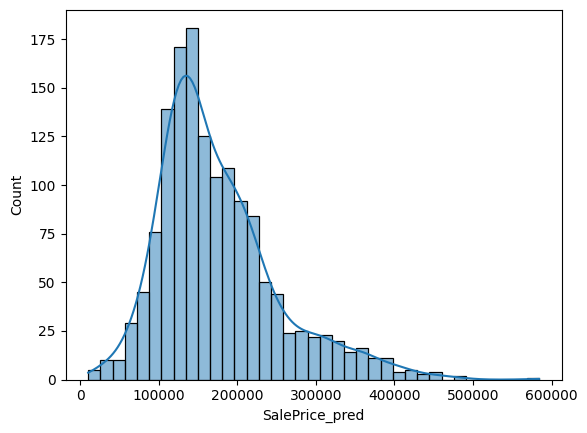

In [78]:

import seaborn as sns
sns.histplot(data=df_final, x='SalePrice_pred', kde=True)

In [79]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<Axes: xlabel='SalePrice', ylabel='Count'>

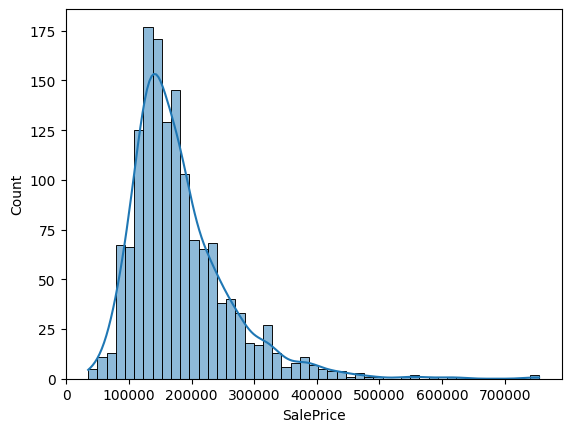

In [80]:
sns.histplot(data=df, x='SalePrice', kde=True)